# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

At the end of the experiment, you will be able to :

* understand how the KNN classifier works for different 'k' values
* perform standard scalar on the data

## Dataset

### History

Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users’ demographic information and target their ads appropriately. Advantages are advertisers can reach users who are interested in their products, allows for detailed analysis and reporting, information gathered is real, not from statistical projections, does not access IP-addresses of the users.

### Description

The dataset chosen for this  experiment is Social Network Ads. The dataset contains 400 records with 5 columns representing the below details.

Data contains 5 columns:


**UserID** - Each person has a unique ID from which we can identify the person uniquely.

**Gender** - Person can be male or female.

**Age** - Age of the person. 

**EstimatedSalary** - This column contains salary of a person.

**Purchased** - Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased. This variable is our target variable.

In [1]:
 !wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/social_advertising.csv

--2022-01-22 07:04:45--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/social_advertising.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10527 (10K) [application/octet-stream]
Saving to: ‘social_advertising.csv’

social_advertising. 100%[===================>]  10.28K  --.-KB/s    in 0s      

2022-01-22 07:04:47 (184 MB/s) - ‘social_advertising.csv’ saved [10527/10527]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [3]:
adv = pd.read_csv("social_advertising.csv")
print(adv.shape)
adv.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print(adv['Purchased'].unique())

[0 1]


In [5]:
adv['Gender'] = adv['Gender'].replace(['Female','Male'],[1, 0])

In [6]:
# Identify the features and labels  
data = adv.drop(['Purchased', 'User ID' ], axis=1)   #data =adv[['Gender','Age','Es']] # adv.iloc[:,1:4]
labels = adv['Purchased']

In [7]:
# Print the first five rows of the features
data.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


### Splitting the data into train and test sets 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
 # Training and testing set ratio is 70 : 30
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [10]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 3), (120, 3), (280,), (120,))

### Training a  Knn Classifier 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)

In [12]:
# Training or fitting the model with the train data
neigh.fit(X_train,y_train)
# Testing the trained model
y_pred = neigh.predict(X_test)

In [13]:
# Calculating the score
#print(neigh.score(X_test, y_test))
from sklearn.metrics import accuracy_score
print('Accuaracy :',accuracy_score(y_pred,y_test))

Accuaracy : 0.7916666666666666


### Scaling the data and Classify

In [14]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Classify using Scaled data
k = 3
neigh_Scale = KNeighborsClassifier(n_neighbors=k)
neigh_Scale.fit(X_train_scale, y_train)
y_pred_Scale = neigh.predict(X_test_scale)
neigh_Scale.score(X_test_scale, y_test)
print(accuracy_score(y_pred_Scale,y_test))

0.6083333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

In [16]:
print(sc.mean_)

[5.10714286e-01 3.75750000e+01 7.05892857e+04]


In [17]:
x_train_sc =sc.transform(X_train)

In [18]:
print(np.round(x_train_sc.mean(axis = 0)))

[ 0. -0.  0.]


In [19]:
print(x_train_sc.std(axis = 0))

[1. 1. 1.]


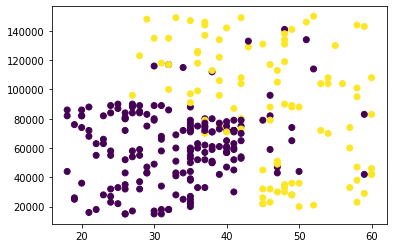

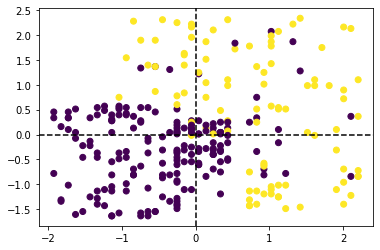

In [20]:
# Plot before and after scaling
import matplotlib.pyplot as plt
plt.scatter(X_train.iloc[:,1], X_train.iloc[:,2], c=y_train, cmap='viridis')
plt.show()
plt.scatter(X_train_scale[:,1], X_train_scale[:,2], c=y_train, cmap='viridis')
plt.axvline(c = 'black',ls ='--')
plt.axhline(c = 'black',ls ='--')
plt.show()

### Exercise : Try to observe the change in score by changing the value of k 

In [22]:
# YOUR CODE HERE
